In [10]:
import os
import sys
import random
import pandas as pd
import numpy as np
import dicom
import matplotlib.pyplot as plt
from time import time
sys.path.append('/home/mingot/lung_cancer_ds_bowl/src')
from utils import plotting, reading, preprocessing
from dl_model_patches import common
from vessel_segmentation.vessel_segmentation import get_vessel_mask, substract_from_existing_mask


In [25]:
patients = [p for p in os.listdir('/mnt/hd2/preprocessed5') if p.startswith('luna')]
patient_data = np.load(os.path.join('/mnt/hd2/preprocessed5',patients[5]))['arr_0']

plotting.slices_with_nodules(patient_data[2])



66
67
68
85


In [26]:
print 'Computing vessels mask...'
tstart = time()
vessel_mask = get_vessel_mask(patient_data[0], binarize_threshold=25)
# if dilate:
#     vessel_mask = dilation(vessel_mask)
print 'Tiempo calculo:', time() - tstart

Computing vessels mask...
Tiempo calculo: 179.060377121


(150, 512, 512)


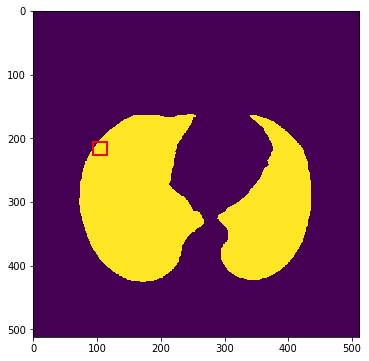

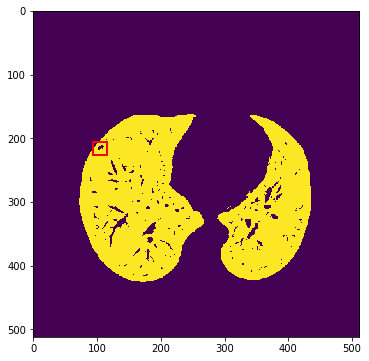

In [27]:
new_lung_mask = substract_from_existing_mask(patient_data[1], vessel_mask)
print new_lung_mask.shape

nslice = 66
plotting.plot_mask(patient_data[1,nslice], patient_data[2,nslice])
plotting.plot_mask(new_lung_mask[nslice], patient_data[2,nslice])
